---
title: "Numerical Integration: A Practical Guide with Python"
author: "Vikreth"
date: "2025-10-29"
categories: [numerical analysis, mathematics, python]
format:
  html:
    code-fold: false
jupyter: python3
image: "1620284146440.png"
---


Integration is one of the fundamental operations in calculus, but many real-world functions are either too complex to integrate analytically or don't have a closed-form solution at all. This is where numerical integration comes to the rescue.

# Why Numerical Integration?

While symbolic integration gives us exact answers, it's often impossible or impractical for functions like:

- Functions with no elementary antiderivative (e.g., $e^{-x^2}$)
- Data points from experiments or measurements
- Complex multi-variable functions
- Functions defined algorithmically

Numerical integration approximates definite integrals by calculating the area under a curve using computational methods.

# The Fundamental Concept

All numerical integration methods approximate the area under a curve by dividing it into smaller, manageable pieces. Think of it like calculating the area of an irregular shape by covering it with small rectangles or trapezoids.

## Method 1: The Riemann Sum

The simplest approach is the Riemann sum, which approximates the area using rectangles.

![Riemann Sum](https://upload.wikimedia.org/wikipedia/commons/8/82/Georg_Friedrich_Bernhard_Riemann.jpeg){: width="50%"}

$$
\int_a^b f(x) dx \approx \sum_{i=1}^{n} f(x_i) \Delta x
$$

Where $\Delta x = \frac{b-a}{n}$, and $f(x_i)$ is the height at a specific point within the interval.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def riemann_sum(f, a, b, n, method='midpoint'):
    """
    Calculate Riemann sum for function f from a to b using n intervals.
    
    Parameters:
    - f: function to integrate
    - a, b: integration bounds
    - n: number of rectangles
    - method: 'left', 'right', or 'midpoint'
    """
    dx = (b - a) / n
    x = np.linspace(a, b, n + 1)
    
    if method == 'left':
        sample_points = x[:-1]
    elif method == 'right':
        sample_points = x[1:]
    else:  # midpoint
        sample_points = (x[:-1] + x[1:]) / 2
    
    return dx * np.sum(f(sample_points))

# Example: integrate x^2 from 0 to 1
f = lambda x: x**2
result = riemann_sum(f, 0, 1, 100)
print(f"Riemann sum approximation: {result:.6f}")
print(f"Exact value: {1/3:.6f}")

Riemann sum approximation: 0.333325
Exact value: 0.333333


## Method 2: The Trapezoidal Rule

Instead of rectangles, the trapezoidal rule uses trapezoids, which better approximate curved functions.
$$
\int_{a}^{b} f(x)\,dx \approx \frac{h}{2}\left(f(x_0) + 2\sum_{i=1}^{n-1} f(x_i) + f(x_n)\right)
$$

Where $h = \frac{b-a}{n}$ and $x_i = a + ih$ for $i = 0, 1, ..., n$.

In [2]:
def trapezoidal_rule(f, a, b, n):
    """
    Integrate function f from a to b using trapezoidal rule with n intervals.
    """
    x = np.linspace(a, b, n + 1)
    y = f(x)
    h = (b - a) / n
    
    # Apply trapezoidal rule
    integral = h * (0.5 * y[0] + np.sum(y[1:-1]) + 0.5 * y[-1])
    return integral

# Example: integrate sin(x) from 0 to π
f = lambda x: np.sin(x)
result = trapezoidal_rule(f, 0, np.pi, 100)
print(f"Trapezoidal rule: {result:.6f}")
print(f"Exact value: {2:.6f}")

Trapezoidal rule: 1.999836
Exact value: 2.000000


## Method 3: Simpson's Rule

Simpson's rule uses parabolic arcs instead of straight lines, providing even better accuracy.
$$
\int_{a}^{b} f(x)\,dx \approx \frac{h}{3}\left(f(x_0) + 4\sum_{i=1, \text{ odd}}^{n-1} f(x_i) + 2\sum_{i=2, \text{ even}}^{n-2} f(x_i) + f(x_n)\right)
$$

Where $h = \frac{b-a}{n}$ and $n$ is even.

In [3]:
def simpsons_rule(f, a, b, n):
    """
    Integrate function f from a to b using Simpson's rule.
    Note: n must be even.
    """
    if n % 2 != 0:
        raise ValueError("n must be even for Simpson's rule")
    
    x = np.linspace(a, b, n + 1)
    y = f(x)
    h = (b - a) / n
    
    # Simpson's rule: (h/3)[y0 + 4y1 + 2y2 + 4y3 + ... + 4yn-1 + yn]
    integral = h / 3 * (y[0] + y[-1] + 
                        4 * np.sum(y[1:-1:2]) + 
                        2 * np.sum(y[2:-1:2]))
    return integral

# Example: integrate e^(-x^2) from 0 to 1
f = lambda x: np.exp(-x**2)
result = simpsons_rule(f, 0, 1, 100)
print(f"Simpson's rule: {result:.6f}")

Simpson's rule: 0.746824


# Comparing Methods

In [4]:
def compare_methods(f, a, b, exact_value, n_values):
    """
    Compare numerical integration methods.
    """
    print(f"{'n':<10} {'Riemann':<15} {'Trapezoidal':<15} {'Simpson':<15}")
    print("-" * 60)
    
    for n in n_values:
        riemann = riemann_sum(f, a, b, n)
        trap = trapezoidal_rule(f, a, b, n)
        simp = simpsons_rule(f, a, b, n if n % 2 == 0 else n + 1)
        
        print(f"{n:<10} {riemann:<15.8f} {trap:<15.8f} {simp:<15.8f}")
    
    print(f"{'Exact:':<10} {exact_value:.8f}")

# Test with f(x) = x^2 from 0 to 1
f = lambda x: x**2
compare_methods(f, 0, 1, 1/3, [10, 50, 100, 500])

n          Riemann         Trapezoidal     Simpson        
------------------------------------------------------------
10         0.33250000      0.33500000      0.33333333     
50         0.33330000      0.33340000      0.33333333     
100        0.33332500      0.33335000      0.33333333     
500        0.33333300      0.33333400      0.33333333     
Exact:     0.33333333


# Using SciPy for Production Code

While implementing these methods is educational, for production code you should use well-tested libraries like SciPy:

In [5]:
from scipy import integrate

# Simple integration
f = lambda x: np.exp(-x**2)
result, error = integrate.quad(f, 0, 1)
print(f"Result: {result:.10f}, Error estimate: {error:.2e}")

# Integration with parameters
f_param = lambda x, a, b: a * x**2 + b * x
result, error = integrate.quad(f_param, 0, 1, args=(2, 3))
print(f"Parametric integration: {result:.6f}")

# Multiple integrals
def integrand(y, x):
    return x * y**2

result, error = integrate.dblquad(integrand, 0, 1, 0, 1)
print(f"Double integral: {result:.6f}")

Result: 0.7468241328, Error estimate: 8.29e-15
Parametric integration: 2.166667
Double integral: 0.166667


# Real-World Application: Calculating Work

Let's solve a physics problem where a varying force is applied:

Work done: 6.67 Joules


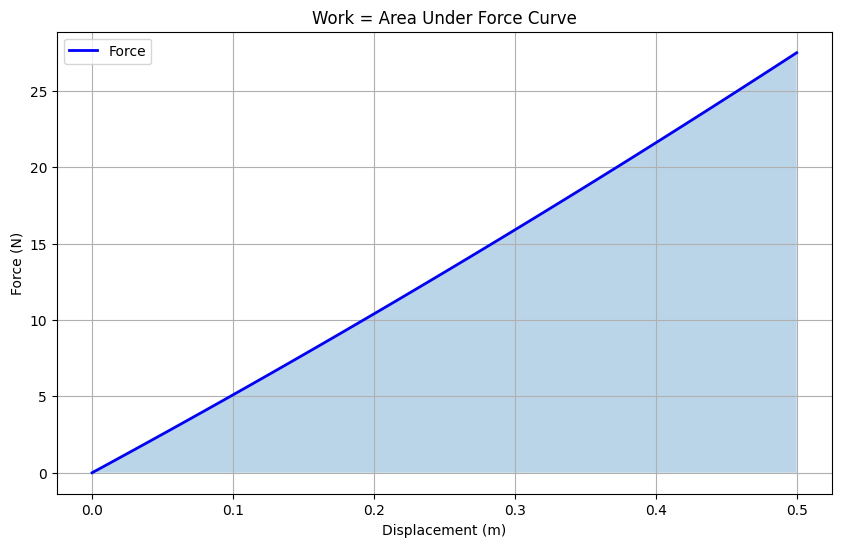

In [6]:
# A spring with varying spring constant
def force(x):
    """Force in Newtons as a function of displacement in meters"""
    return 50 * x + 10 * x**2

# Work done compressing spring from 0 to 0.5 meters
work, error = integrate.quad(force, 0, 0.5)
print(f"Work done: {work:.2f} Joules")

# Visualize
x = np.linspace(0, 0.5, 100)
plt.figure(figsize=(10, 6))
plt.plot(x, force(x), 'b-', linewidth=2, label='Force')
plt.fill_between(x, force(x), alpha=0.3)
plt.xlabel('Displacement (m)')
plt.ylabel('Force (N)')
plt.title('Work = Area Under Force Curve')
plt.grid(True)
plt.legend()
plt.show()

# Error Analysis and Convergence

Understanding error is crucial in numerical methods:

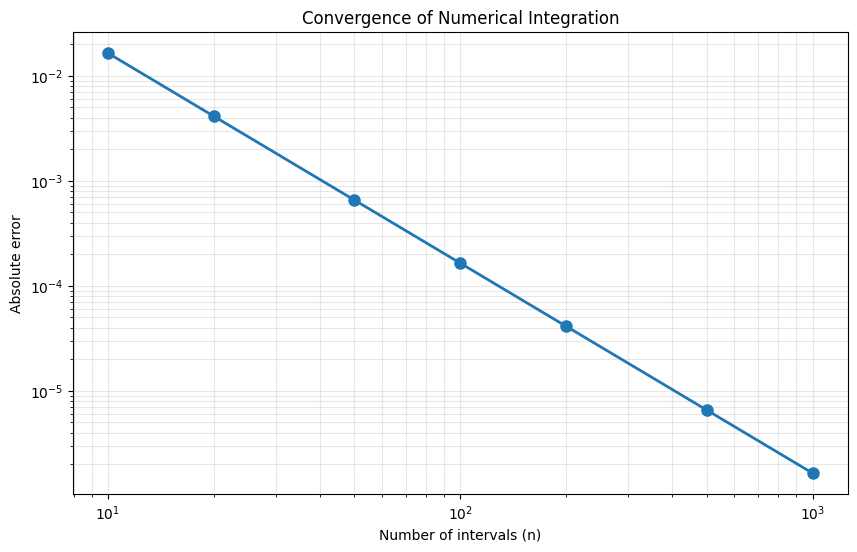

In [7]:
def analyze_convergence(f, a, b, exact, method_func):
    """
    Analyze how error decreases as n increases.
    """
    n_values = [10, 20, 50, 100, 200, 500, 1000]
    errors = []
    
    for n in n_values:
        approx = method_func(f, a, b, n)
        error = abs(approx - exact)
        errors.append(error)
    
    plt.figure(figsize=(10, 6))
    plt.loglog(n_values, errors, 'o-', linewidth=2, markersize=8)
    plt.xlabel('Number of intervals (n)')
    plt.ylabel('Absolute error')
    plt.title('Convergence of Numerical Integration')
    plt.grid(True, which="both", alpha=0.3)
    plt.show()

# Test convergence
f = lambda x: np.sin(x)
analyze_convergence(f, 0, np.pi, 2, trapezoidal_rule)

# Best Practices

1. Choose the right method: Simpson's rule is usually more accurate than trapezoidal for smooth functions
2. Start with fewer intervals: Test with small n, then increase until results stabilize
3. Check for convergence: Verify that increasing n doesn't significantly change the result
4. Use adaptive methods: SciPy's quad automatically adjusts the step size for optimal accuracy
5. Handle singularities carefully: Be cautious with functions that have discontinuities or infinite values

# Conclusion

Numerical integration is a powerful tool that bridges the gap between theory and practice. While the basic methods (Riemann sums, trapezoidal rule, Simpson's rule) are great for understanding the concepts, modern libraries like SciPy provide robust, efficient implementations for real-world problems.
The key takeaway is that numerical integration transforms an impossible analytical problem into a tractable computational one, making it indispensable in science, engineering, and data analysis.
Further Reading

1. Explore adaptive quadrature methods
2. Learn about Monte Carlo integration for high-dimensional integrals
3. Study Gaussian quadrature for maximum efficiency
4. Investigate numerical methods for improper integrals

Happy integrating!